In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from dlc_practical_prologue import *
from projet1_helpers import *

import CNN

import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

## CNN

Use a simple convolutional neural network whose architecture is similar to the classical LeNet. 

In [22]:
all_classified = []
misclassified = []
accuracies_train = []
accuracies_test = []
mini_batch_size = 100
for i in range(15):
    print("-"*50,f" \n Iteration {i} \n ")
    # Generate the pairs
    train_input, train_target, train_classes, test_input, test_target, test_classes = generate_pair_sets(1000)

    train_onehot = convert_to_one_hot_labels(train_input,train_target)
    test_onehot = convert_to_one_hot_labels(test_input,test_target)

    # define the model
    model = CNN.CNN() 

    # train model
    for k in range(25):
        CNN.train(model, train_input, train_target, mini_batch_size)
    
    train_accuracy = CNN.accuracy(model(train_input),train_onehot)
    test_accuracy = CNN.accuracy(model(test_input),test_onehot)
    
    misclass = CNN.get_mis_class(model,test_input,test_target,test_classes)
    [all_classified.append(x) for x in test_classes]
    [misclassified.append(x) for x in misclass ]
    accuracies_train.append(train_accuracy )
    accuracies_test.append(test_accuracy )
    print(f"Training accuracy is {train_accuracy} ")
    print(f"Test accuracy is {test_accuracy} ")

--------------------------------------------------  
 Iteration 0 
 
Training accuracy is 0.997 
Test accuracy is 0.802 
--------------------------------------------------  
 Iteration 1 
 
Training accuracy is 0.986 
Test accuracy is 0.797 
--------------------------------------------------  
 Iteration 2 
 
Training accuracy is 0.998 
Test accuracy is 0.792 
--------------------------------------------------  
 Iteration 3 
 
Training accuracy is 0.995 
Test accuracy is 0.811 
--------------------------------------------------  
 Iteration 4 
 
Training accuracy is 0.997 
Test accuracy is 0.796 
--------------------------------------------------  
 Iteration 5 
 
Training accuracy is 0.994 
Test accuracy is 0.801 
--------------------------------------------------  
 Iteration 6 
 
Training accuracy is 0.994 
Test accuracy is 0.8 
--------------------------------------------------  
 Iteration 7 
 
Training accuracy is 0.999 
Test accuracy is 0.791 
----------------------------------

### Evaluation of model performance

In [23]:
accs_train = torch.Tensor(accuracies_train)
print(f"The training accuracy of the model is {accs_train.mean():.4f} ± {accs_train.var():.4f} ")

The training accuracy of the model is 0.9955 ± 0.0000 


In [24]:
accs_test = torch.Tensor(accuracies_test)
print(f"The test accuracy of the model is {accs_test.mean():.4f} ± {accs_test.var():.4f} ")

The test accuracy of the model is 0.7974 ± 0.0001 


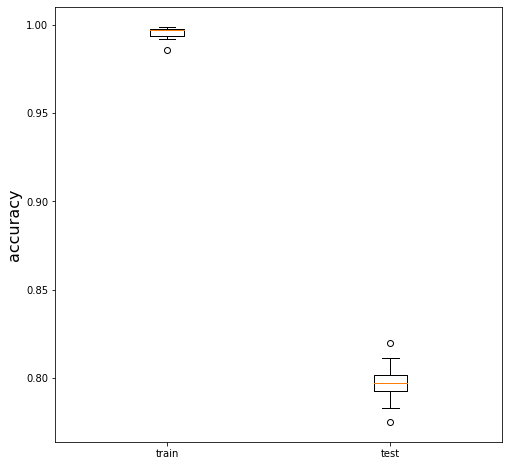

In [25]:
plot_performance(accuracies_train,accuracies_test)

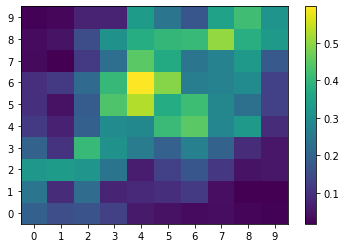

In [26]:
all_classified = np.stack(all_classified)
misclassified = np.stack(misclassified)
plot_heatmap(misclassified,all_classified)